<a href="https://colab.research.google.com/github/Arpit2811/OIBSIP/blob/main/oasis_project_8_Unveiling_the_Android_App_Market_Analyzing_Google_Play_Store_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Loading the dataset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

apps_df = pd.read_csv('apps.csv')
reviews_df = pd.read_csv('user_reviews.csv')

apps_df.head()
reviews_df.head()


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


2. data cleaning and processing

In [7]:

apps_df.dropna(subset=['App', 'Category'], inplace=True)
apps_df['Rating'] = apps_df['Rating'].fillna(apps_df['Rating'].mean())
apps_df['Reviews'] = apps_df['Reviews'].astype(str).str.replace(',', '').astype(float)
apps_df['Installs'] = apps_df['Installs'].str.replace('[+,]', '', regex=True).astype(float)
apps_df['Price'] = apps_df['Price'].str.replace('$', '', regex=False).astype(float)


In [10]:
def convert_size(size):

    if isinstance(size, str):
        if 'M' in size:
            return float(size.replace('M', '')) * 1_000_000
        elif 'k' in size:
            return float(size.replace('k', '')) * 1_000

    return np.nan


apps_df['Size'] = apps_df['Size'].replace('Varies with device', np.nan)


size_converted = apps_df['Size'][apps_df['Size'].apply(lambda x: isinstance(x, str) or pd.isna(x))].map(convert_size)
apps_df['Size'] = size_converted

3. Category Exploration

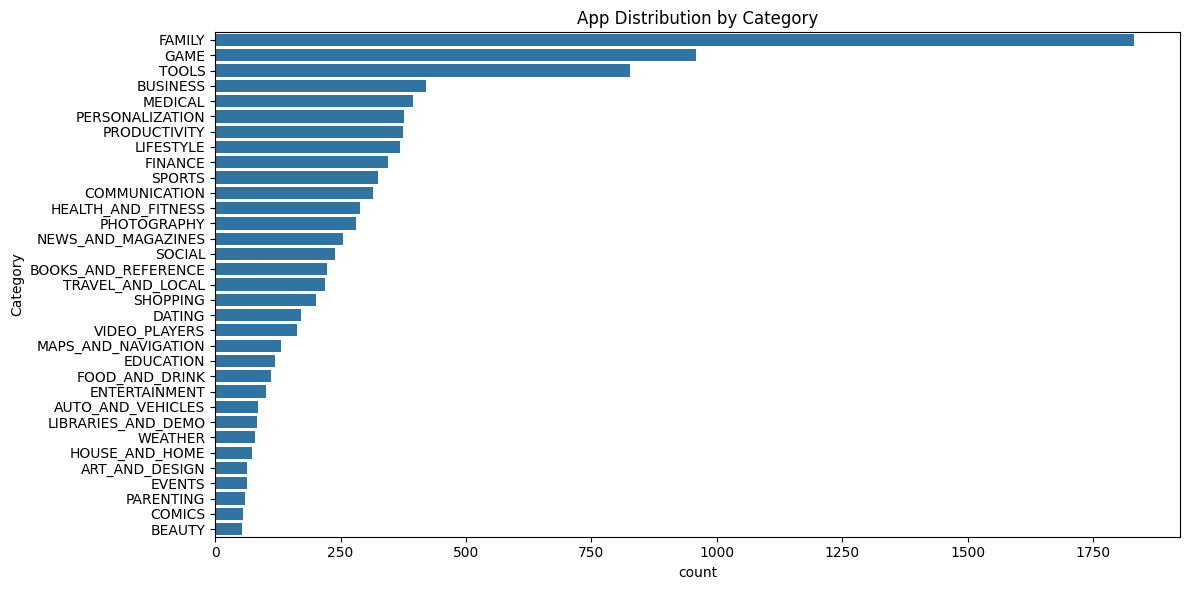

In [11]:
plt.figure(figsize=(12, 6))
sns.countplot(data=apps_df, y='Category', order=apps_df['Category'].value_counts().index)
plt.title('App Distribution by Category')
plt.tight_layout()
plt.show()


4.  Metrics Analysis

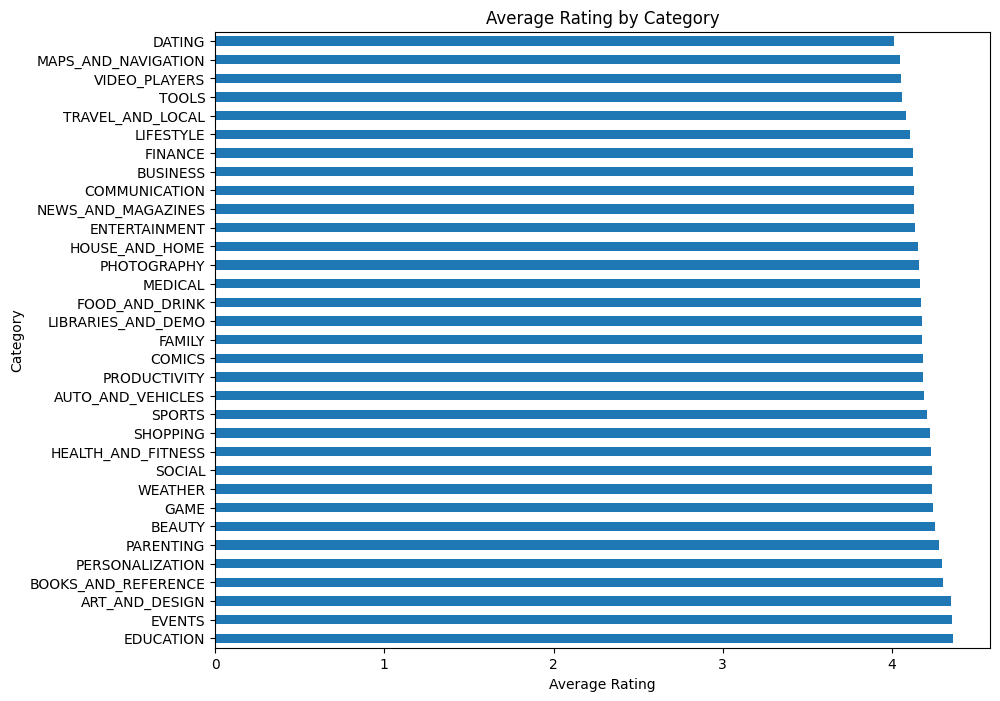

In [12]:
apps_df.groupby('Category')['Rating'].mean().sort_values(ascending=False).plot(kind='barh', figsize=(10, 8), title='Average Rating by Category')
plt.xlabel('Average Rating')
plt.show()


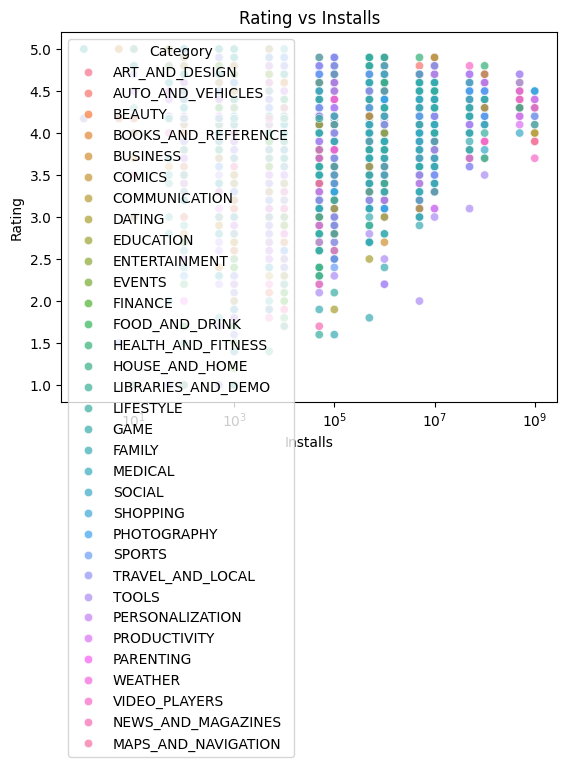

In [13]:
sns.scatterplot(data=apps_df, x='Installs', y='Rating', hue='Category', alpha=0.7)
plt.title('Rating vs Installs')
plt.xscale('log')
plt.show()


5. sentiment analysis (user_reviews.csv)

In [14]:
reviews_df.dropna(subset=['Translated_Review'], inplace=True)


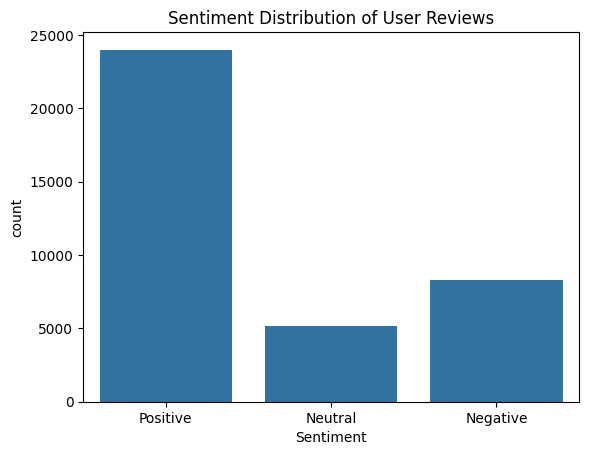

In [15]:
sns.countplot(data=reviews_df, x='Sentiment')
plt.title('Sentiment Distribution of User Reviews')
plt.show()


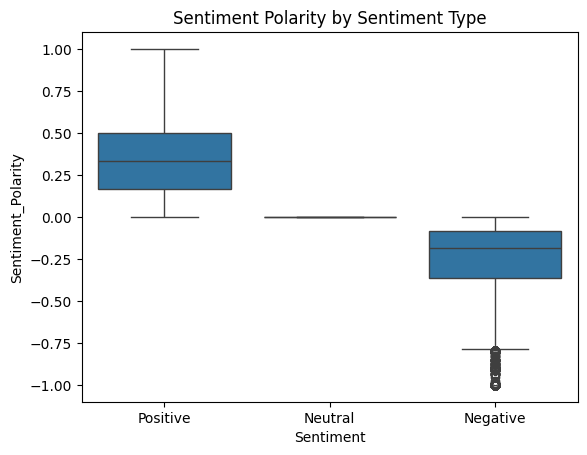

In [16]:
sns.boxplot(data=reviews_df, x='Sentiment', y='Sentiment_Polarity')
plt.title('Sentiment Polarity by Sentiment Type')
plt.show()


6. Merging App and Review Data

In [17]:
merged_df = pd.merge(apps_df, reviews_df, on='App', how='inner')


In [18]:
merged_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967.0,NaN,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,NaN,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967.0,NaN,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967.0,NaN,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967.0,NaN,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800,0.900000
